# Atom transition network

For theoretical background, see [article](https://doi.org/10.1371/journal.pcbi.1004999):

Identification of Conserved Moieties in Metabolic Networks by Graph Theoretical Analysis of Atom Transition Networks
Haraldsdóttir HS, Fleming RMT (2016) PLOS Computational Biology 12(11): e1004999. https://doi.org/10.1371/journal.pcbi.1004999 

From the article:

_Metabolic reactions conserve mass and chemical elements. Therefore, there must exist a mapping from each atom in a reactant metabolite to a single atom of the same element in a product metabolite. An atom transition is a single mapping from a substrate to a product atom. An atom transition network contains information about all atom transitions in a metabolic network. It is a mathematical structure that enables one to trace the paths of each individual atom through a metabolic network._

**Lets construct Atom Transition Network for Rhea reactions.**

1. Initiate RheaDB class: load Rhea data into memory

In [1]:
from pyrheadb.RheaDB import RheaDB
rdb = RheaDB()

Your Rhea DB version is 133
Using previously downloaded Rhea version


Drop reactions with * (R-compound reactions, not used in atom-transition network)

2. Initiate AtomTransitionNetwork class: class that transforms Rhea data into transition network using AtomMapper

In [2]:
from pyrheadb.AtomTransitionNetwork import AtomTransitionNetwork
atn = AtomTransitionNetwork(rheadata=rdb)

/scratch/pyrheadb/pyrheadbenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/scratch/pyrheadb/pyrheadbenv/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Calculating reaction balance


100%|█████████████████████████████████| 16393/16393 [00:00<00:00, 319273.88it/s]


In [3]:
atn.create_atom_transition_network()

100%|████████████████████████████████████| 12701/12701 [00:25<00:00, 503.16it/s]


In [4]:
atn.plot_subgraph_size_vs_count(plotid='default')

Number of subgraphs: 33944
Number of compound-assigned atoms in the biggest subgraph: 190526
Atoms disconnected from biggest subnetwork: 89388


In [5]:
from IPython.display import Image
import os

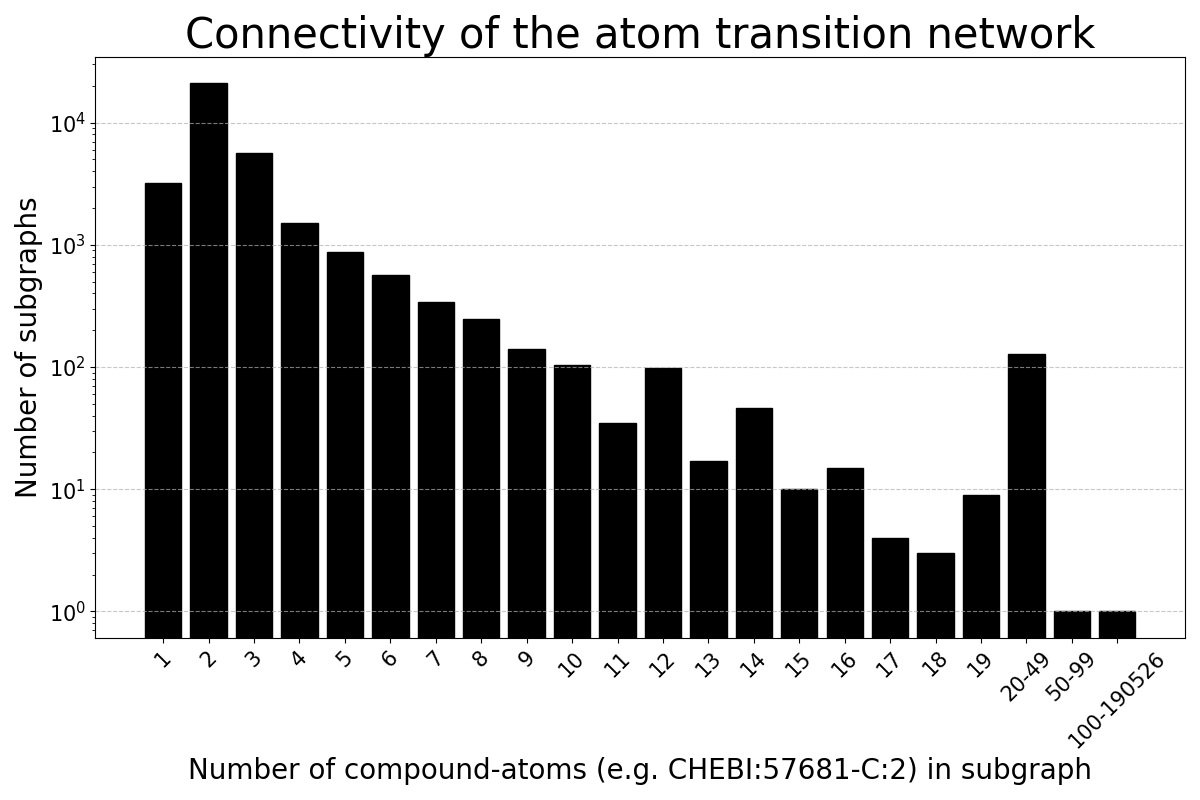

In [6]:
Image(filename=os.path.join('plots', 'atom_transition_network_subgraphs_size_vs_count_default.png'), width=600)

In [7]:
# This snippet is needed if you modified the atn.G and now you want to lead the original one from the pickle file

import pandas as pd
import networkx as nx
atn.load_networkx_graph()

In [8]:
# This snippet prints a list of all compound-items that are lonely - result of transport reactions and polymer reactions

# for subgraph in nx.connected_components(atn.G):
#     if len(subgraph)==1:
#         print(subgraph)

In [9]:
non_polymers = [node for node in atn.G.nodes() if not node.startswith('POLYMER')]

In [10]:
print('Total compound-atoms:', len(atn.G.nodes()))
print('Non polymer compound-atoms:', len(non_polymers))
print('Polymer compound-atoms (excluded):', len(atn.G.nodes())-len(non_polymers))
non_polymer_subgraph = atn.G.subgraph(non_polymers).copy()
atn.G = non_polymer_subgraph

Total compound-atoms: 279914
Non polymer compound-atoms: 279914
Polymer compound-atoms (excluded): 0


In [11]:
print(atn.G)

Graph with 279914 nodes and 319002 edges


In [12]:
atn.plot_subgraph_size_vs_count(plotid='no_polymers')

Number of subgraphs: 33944
Number of compound-assigned atoms in the biggest subgraph: 190526
Atoms disconnected from biggest subnetwork: 89388


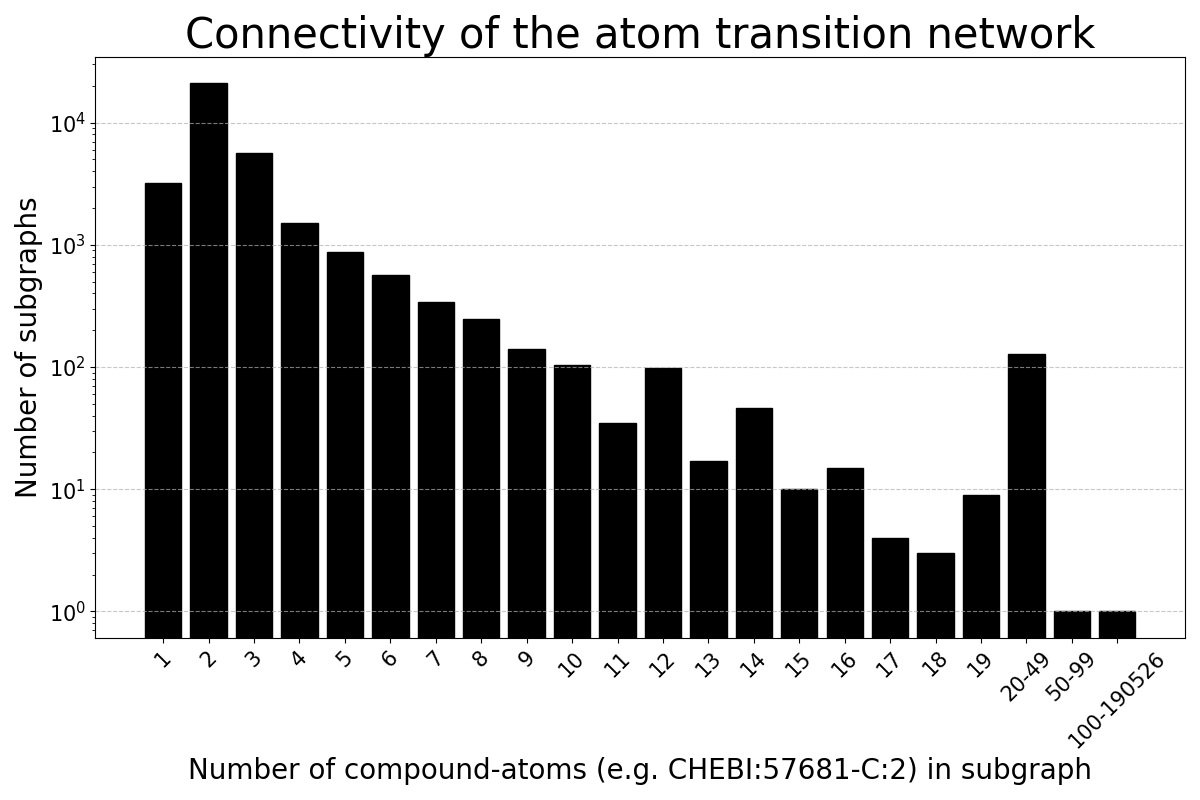

In [13]:
Image(filename=os.path.join('plots', 'atom_transition_network_subgraphs_size_vs_count_no_polymers.png'), width=600)

In [14]:
# This snippet prints a list of all compound-items that are lonely - result of transport reactions and polymer reactions

for subgraph in nx.connected_components(atn.G):
    if len(subgraph)==1:
        print(subgraph)

{'CHEBI:57681-C:2'}
{'CHEBI:57681-C:4'}
{'CHEBI:57681-C:5'}
{'CHEBI:57681-C:6'}
{'CHEBI:57681-C:7'}
{'CHEBI:57681-C:9'}
{'CHEBI:57681-Cl:8'}
{'CHEBI:57681-O:1'}
{'CHEBI:57681-O:10'}
{'CHEBI:57681-O:11'}
{'CHEBI:57681-O:3'}
{'CHEBI:48775-Cd:1'}
{'CHEBI:29101-Na:1'}
{'CHEBI:49468-Ag:1'}
{'CHEBI:29103-K:1'}
{'CHEBI:29108-Ca:1'}
{'CHEBI:29105-Zn:1'}
{'CHEBI:16746-C:10'}
{'CHEBI:16746-C:2'}
{'CHEBI:16746-C:3'}
{'CHEBI:16746-C:4'}
{'CHEBI:16746-C:6'}
{'CHEBI:16746-C:8'}
{'CHEBI:16746-O:1'}
{'CHEBI:16746-O:5'}
{'CHEBI:16746-O:7'}
{'CHEBI:16746-O:9'}
{'CHEBI:18167-C:10'}
{'CHEBI:18167-C:12'}
{'CHEBI:18167-C:15'}
{'CHEBI:18167-C:16'}
{'CHEBI:18167-C:18'}
{'CHEBI:18167-C:2'}
{'CHEBI:18167-C:20'}
{'CHEBI:18167-C:22'}
{'CHEBI:18167-C:3'}
{'CHEBI:18167-C:5'}
{'CHEBI:18167-C:7'}
{'CHEBI:18167-C:8'}
{'CHEBI:18167-O:1'}
{'CHEBI:18167-O:11'}
{'CHEBI:18167-O:13'}
{'CHEBI:18167-O:14'}
{'CHEBI:18167-O:17'}
{'CHEBI:18167-O:19'}
{'CHEBI:18167-O:21'}
{'CHEBI:18167-O:23'}
{'CHEBI:18167-O:4'}
{'CHEBI:18167-O:6